# Exploratory Data Analysis (EDA)

In [ ]:
# Vamos começar importando as bibliotecas e o conjunto de dados a serem usados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

wine_quality = pd.read_csv("../bases/winequality-red.csv", sep = ",")

In [ ]:
wine_quality.head()

In [ ]:
# Vamos ver as últimas 5 linhas
wine_quality.tail()

In [ ]:
#linhas e colunas 
print(wine_quality.shape)

In [ ]:
# nome dos atributos/colunas
wine_quality.columns

Provavelmente se não somos conhecedores de vinhos, estas variáveis ​​fazem pouco sentido para nós. Lembremos que o ideal é que tenhamos conhecimento do assunto que vamos trabalhar (claro que também podemos contratar um especialista para nos orientar 😉).

Para mais informações sobre o significado de cada variável, podemos acessar os seguintes links:
* https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
* https://waterhouse.ucdavis.edu/whats-in-wine
* https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* https://www.mt.com/gb/en/home/supportive_content/ana_chem_applications/titration/AP015.html

In [ ]:
#Tipo de dato para cada columna
wine_quality.dtypes

**Completude dos dados**:
Antes de iniciar qualquer análise, é bom revisar os dados em busca de informações faltantes; e se houver, decidir o que podemos fazer com esses registros ausentes. Com dataframes do pandas, podemos usar a função info() para encontrar os dados ausentes.

In [ ]:
wine_quality.info()

In [ ]:
#Outra forma de obter as mesmas informações seria calcular todos os registros por colunas
wine_quality.count()

In [ ]:
#Antes de analizar lo principales estadísticos, verifiquemos si tenemos como estructura de dato un dataframe!
type(wine_quality)

# Estadísticas descriptivas

In [ ]:
wine_quality.describe()

In [ ]:
# Vamos usar a função round para visualizar melhor nossos dados
wine_quality.describe().round()

In [ ]:
#Histograma
from seaborn import displot
displot(wine_quality.quality,kind="kde")

Como podemos ver, nosso conjunto de dados é desequilibrado, com muito mais 5 e 6 do que qualquer outro valor.

In [ ]:
# Podemos usar um pouco de código para exibir mais de uma variável por vez
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    #sns.distplot(wine_quality[variable], ax=axes[i][j])
    #sns.displot(wine_quality[variable], ax=axes[i][j],kde=True)
    sns.histplot(wine_quality[variable], ax=axes[i][j],kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

In [ ]:
#Veamos otra variable!
displot(wine_quality["volatile acidity"],kde=True)

A partir deste gráfico podemos identificar vários aspectos, como, por exemplo, que muitas das variáveis apresentam distribuição assimétrica (acidez fixa, açúcar residual, cloretos, por exemplo), além do fato de alguns valores parecerem ter valores extremos (açúcar residual, sulfatos, dióxido de enxofre total).

# Boxplots
Como sabemos, os boxplots permitem-nos analisar e ver muito rapidamente quais variáveis têm valores extremos.

In [ ]:
variables = ['fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide','sulphates', 'alcohol']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=wine_quality, ax=ax)
plt.tight_layout()

# Scatterplots
Agora vamos tentar identificar de forma rápida e visual a correlação entre as variáveis!

In [ ]:
from seaborn import lmplot
lmplot(x='free sulfur dioxide', y='total sulfur dioxide', data=wine_quality, fit_reg=True) 

No gráfico anterior pode-se observar uma clara relação entre as variáveis ​​analisadas. Também podemos
usar a Matriz de Correlação se quisermos ver, por exemplo, o coeficiente de **Pearson**

In [ ]:
correlation = wine_quality.corr(method="pearson")
correlation.round(3)

In [ ]:

plt.figure(figsize=(15,15)) 

# Gera o mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

# Eu giro os eixos para que fiquem inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# Complemento 😉

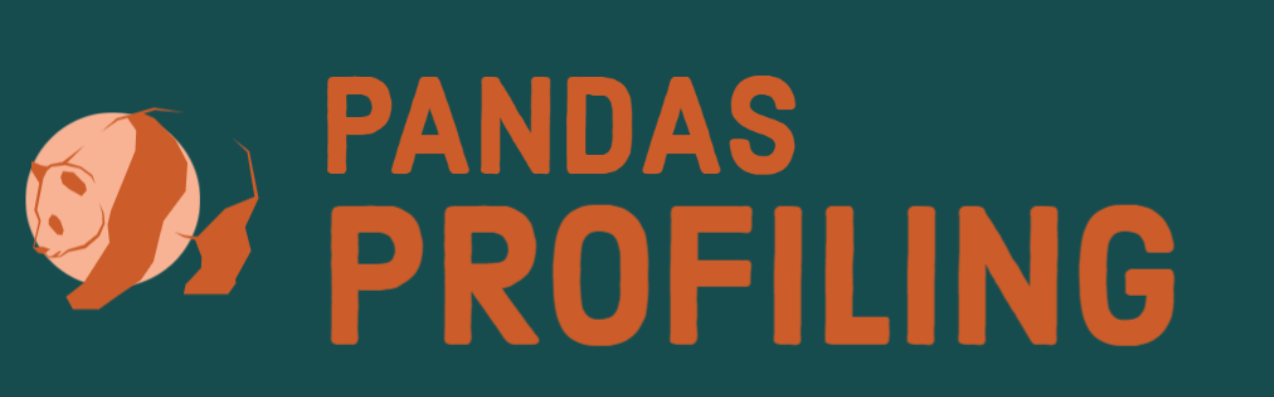

O perfil do Pandas é um módulo Python de código aberto com o qual podemos fazer análises exploratórias de dados rapidamente com apenas algumas linhas de código. Também gera relatórios interativos em formato web.

Link: https://pypi.org/project/pandas-profiling/

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(wine_quality, minimal=True)